In [41]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import numpy as np

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Encoding

In [6]:
label_encoder=preprocessing.LabelEncoder()
df['Attrition']=label_encoder.fit_transform(df['Attrition'])
df['Attrition'].unique()

array([1, 0])

In [7]:
encoder=OrdinalEncoder(categories=[['Travel_Rarely','Travel_Frequently','Non-Travel']])
df['BusinessTravel']=encoder.fit_transform(df[['BusinessTravel']])
df['BusinessTravel'].unique()

array([0., 1., 2.])

In [8]:
ohe=OneHotEncoder(sparse_output=False) 
data=ohe.fit_transform(df[['Department']])
ef=pd.DataFrame(data,columns=['Sales','Research & Development','Human Resources'])
df=df.join(ef)

In [9]:
df["EducationField"].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [10]:
frequency_map = df['EducationField'].value_counts(normalize=True)
df['Education_Field'] = df['EducationField'].map(frequency_map)

In [11]:
ohe=OneHotEncoder(sparse_output=False) 
data=ohe.fit_transform(df[['Gender']])
ef=pd.DataFrame(data,columns=['Female','Male'])
df=df.join(ef)

In [12]:
df["JobRole"].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [13]:
frequency_map = df['JobRole'].value_counts(normalize=True)
df['Job_Role'] = df['JobRole'].map(frequency_map)

In [14]:
ohe=OneHotEncoder(sparse_output=False) 
data=ohe.fit_transform(df[['MaritalStatus']])
ef=pd.DataFrame(data,columns=['Single','Married','Divorced'])
df=df.join(ef)

In [15]:
ohe=OneHotEncoder(sparse_output=False) 
data=ohe.fit_transform(df[['OverTime']])
ef=pd.DataFrame(data,columns=['OverTime_ed','OverTime_No'])
df=df.join(ef)

In [16]:
df.drop(['Department','Gender','JobRole','EducationField','MaritalStatus','OverTime', 'OverTime_No', "Over18"], axis=1, inplace=True)

In [17]:
df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,Research & Development,Human Resources,Education_Field,Female,Male,Job_Role,Single,Married,Divorced,OverTime_ed
0,41,1,0.0,1102,1,2,1,1,2,94,...,0.0,1.0,0.412245,1.0,0.0,0.221769,0.0,0.0,1.0,0.0
1,49,0,1.0,279,8,1,1,2,3,61,...,1.0,0.0,0.412245,0.0,1.0,0.198639,0.0,1.0,0.0,1.0
2,37,1,0.0,1373,2,2,1,4,4,92,...,1.0,0.0,0.055782,0.0,1.0,0.176190,0.0,0.0,1.0,0.0
3,33,0,1.0,1392,3,4,1,5,4,56,...,1.0,0.0,0.412245,1.0,0.0,0.198639,0.0,1.0,0.0,0.0
4,27,0,0.0,591,2,1,1,7,1,40,...,1.0,0.0,0.315646,0.0,1.0,0.176190,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1.0,884,23,2,1,2061,3,41,...,1.0,0.0,0.315646,0.0,1.0,0.176190,0.0,1.0,0.0,1.0
1466,39,0,0.0,613,6,1,1,2062,4,42,...,1.0,0.0,0.315646,0.0,1.0,0.089116,0.0,1.0,0.0,1.0
1467,27,0,0.0,155,4,3,1,2064,2,87,...,1.0,0.0,0.412245,0.0,1.0,0.098639,0.0,1.0,0.0,0.0
1468,49,0,1.0,1023,2,3,1,2065,4,63,...,0.0,1.0,0.315646,0.0,1.0,0.221769,0.0,1.0,0.0,1.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EmployeeCount             1470 non-null   int64  
 7   EmployeeNumber            1470 non-null   int64  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobLevel                  1470 non-null   int64  
 12  JobSatisfaction           1470 non-null   int64  
 13  MonthlyIncome             1470 non-null   int64  
 14  MonthlyR

# Train Test Split

In [19]:
X1 = df.iloc[:,0]
X2=df.iloc[:,2:]
X=pd.concat([X1,X2],axis=1)

In [20]:
y = df.iloc[:,1]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest


In [23]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train,y_train)
rf.oob_score_

0.8579931972789115

In [24]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8775510204081632

# Naive Bayes

In [25]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7755102040816326


# Support Vector Machine

In [27]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [28]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8843537414965986


# KNN Classifier

In [29]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

0.8673469387755102

# Cross Validation


In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_classifier, X_train, y_train, cv=5, scoring='accuracy')

array([0.84322034, 0.85957447, 0.85106383, 0.85531915, 0.85957447])

# Hyperparameter Tuning(Grid Search CV)

In [32]:
param_grid = {
    "C": [0.1, 1, 10, 100, 1000],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [2, 3, 4],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1, 10, 100],  
    "coef0": [0.0, 0.1, 0.5, 1.0, 2.0]  
}


In [33]:
grid = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'coef0': [0.0, 0.1, 0.5, 1.0, 2.0],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10,
                                   100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [34]:
grid.best_score_

0.8622646952758745

In [35]:
grid.best_params_

{'C': 1000, 'coef0': 0.5, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}

In [36]:
best_estimator = grid.best_estimator_

In [37]:
y_pred = best_estimator.predict(X_test)

# Results

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy on test set:", accuracy)
print("Classification Report:\n", class_report)

Accuracy on test set: 0.9013605442176871
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       255
           1       0.92      0.28      0.43        39

    accuracy                           0.90       294
   macro avg       0.91      0.64      0.69       294
weighted avg       0.90      0.90      0.88       294



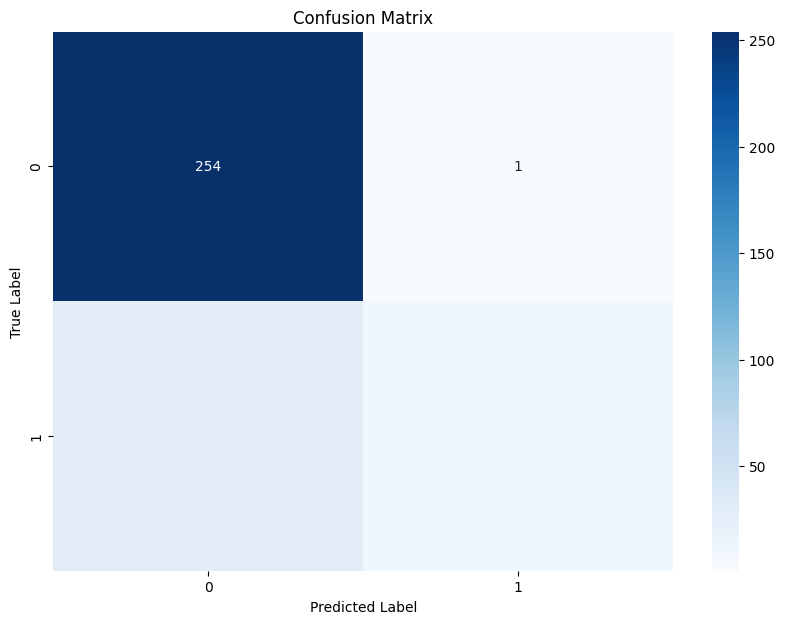

In [42]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [43]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.close()


In [44]:
with open("classification_report.txt", "w") as f:
    f.write(f"Accuracy on test set: {accuracy}\n\n")
    f.write("Classification Report:\n")
    f.write(class_report)
